# Data Analysis

## Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
print("libraries imported")

libraries imported


## Importing the training and test data-set csv files

In [2]:
train_initial = pd.read_csv("/Users/sobil/Documents/MSC/Sem2/PredictiveAnalysis/Project/DataSet/1088-1967-bundle-archive/credit_train.csv")
train_initial.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [3]:
train_initial.tail(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
train_initial.shape

test_initial = pd.read_csv("/Users/sobil/Documents/MSC/Sem2/PredictiveAnalysis/Project/DataSet/1088-1967-bundle-archive/credit_test.csv")
test_initial.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0


In [5]:
test_initial.tail(10)

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
10343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
test_initial.shape

(10353, 18)

<font color='blue'>
<b>From above it is evident that, few rows are empty (containg NaN's) in both testing and training datasets


Shape ::

Train data-set : [100514,19]

Test data-set : [10353,18]
</b>

## Checking column names, data types, description & info. on training and testing data-sets

In [7]:
train_initial.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [8]:
test_initial.columns

Index(['Loan ID', 'Customer ID', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

<font color='blue'>
<b>From above it can be seen, Loan Status column is not present in the testing data set</b>

In [9]:
train_initial.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [10]:
test_initial.dtypes

Loan ID                          object
Customer ID                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

<font color='blue'>
<b>Above it can be seen, <i>"Years in current job"</i> column dtype as object, which should ideally be float.</b>

In [11]:
train_initial.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [12]:
train_initial.describe(include="all")

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,100000,100000,100000,1.000000e+05,100000,80846.000000,8.084600e+04,95778,100000,100000,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
unique,81999,81999,2,NaN,2,NaN,NaN,11,4,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,13e7bee4-faf9-43c2-8302-efa34dd672aa,4413e5ab-27b0-4dc3-938c-701f74e1ef85,Fully Paid,NaN,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,2,77361,NaN,72208,NaN,NaN,31121,48410,78552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.176045e+07,NaN,1076.456089,1.378277e+06,NaN,NaN,NaN,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,NaN,NaN,NaN,3.178394e+07,NaN,1475.403791,1.081360e+06,NaN,NaN,NaN,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,NaN,NaN,NaN,1.080200e+04,NaN,585.000000,7.662700e+04,NaN,NaN,NaN,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,NaN,NaN,NaN,1.796520e+05,NaN,705.000000,8.488440e+05,NaN,NaN,NaN,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,NaN,NaN,NaN,3.122460e+05,NaN,724.000000,1.174162e+06,NaN,NaN,NaN,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,NaN,NaN,NaN,5.249420e+05,NaN,741.000000,1.650663e+06,NaN,NaN,NaN,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000


In [13]:
test_initial.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+04,8019.000000,8.019000e+03,10000.000000,10000.000000,4694.000000,10000.00000,10000.000000,1.000000e+04,1.000000e+04,9978.000000,9999.000000
mean,1.160380e+07,1077.991520,1.369106e+06,18429.671699,18.235930,34.964636,11.08410,0.165500,2.907301e+05,6.871308e+05,0.116356,0.030803
std,3.160010e+07,1477.467761,8.687557e+05,12399.956192,7.018356,21.640291,5.02338,0.500934,3.881687e+05,1.861394e+06,0.349961,0.288215
min,1.947000e+04,585.000000,8.109200e+04,0.000000,3.800000,0.000000,1.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.789480e+05,706.000000,8.483405e+05,10202.857500,13.600000,17.000000,7.00000,0.000000,1.086515e+05,2.706000e+05,0.000000,0.000000
50%,3.092760e+05,725.000000,1.168272e+06,16052.055000,17.000000,32.000000,10.00000,0.000000,2.075180e+05,4.626050e+05,0.000000,0.000000
75%,5.157075e+05,741.000000,1.664390e+06,23881.337500,21.700000,50.000000,14.00000,0.000000,3.624630e+05,7.861150e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.781535e+07,229057.920000,62.500000,131.000000,55.00000,10.000000,1.623744e+07,1.459073e+08,5.000000,9.000000


In [14]:
test_initial.describe(include="all")

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,10000,10000,1.000000e+04,10000,8019.000000,8.019000e+03,9573,10000,10000,10000.000000,10000.000000,4694.000000,10000.00000,10000.000000,1.000000e+04,1.000000e+04,9978.000000,9999.000000
unique,10000,10000,NaN,2,NaN,NaN,11,4,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0853a683-f038-40fe-ab8d-ad9d25eb2466,c4d576df-9b65-46b3-931b-16324ab09712,NaN,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,7295,NaN,NaN,3085,4867,7878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.160380e+07,NaN,1077.991520,1.369106e+06,NaN,NaN,NaN,18429.671699,18.235930,34.964636,11.08410,0.165500,2.907301e+05,6.871308e+05,0.116356,0.030803
std,NaN,NaN,3.160010e+07,NaN,1477.467761,8.687557e+05,NaN,NaN,NaN,12399.956192,7.018356,21.640291,5.02338,0.500934,3.881687e+05,1.861394e+06,0.349961,0.288215
min,NaN,NaN,1.947000e+04,NaN,585.000000,8.109200e+04,NaN,NaN,NaN,0.000000,3.800000,0.000000,1.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,NaN,NaN,1.789480e+05,NaN,706.000000,8.483405e+05,NaN,NaN,NaN,10202.857500,13.600000,17.000000,7.00000,0.000000,1.086515e+05,2.706000e+05,0.000000,0.000000
50%,NaN,NaN,3.092760e+05,NaN,725.000000,1.168272e+06,NaN,NaN,NaN,16052.055000,17.000000,32.000000,10.00000,0.000000,2.075180e+05,4.626050e+05,0.000000,0.000000
75%,NaN,NaN,5.157075e+05,NaN,741.000000,1.664390e+06,NaN,NaN,NaN,23881.337500,21.700000,50.000000,14.00000,0.000000,3.624630e+05,7.861150e+05,0.000000,0.000000


In [15]:
train_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [16]:
test_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10353 entries, 0 to 10352
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       10000 non-null  object 
 1   Customer ID                   10000 non-null  object 
 2   Current Loan Amount           10000 non-null  float64
 3   Term                          10000 non-null  object 
 4   Credit Score                  8019 non-null   float64
 5   Annual Income                 8019 non-null   float64
 6   Years in current job          9573 non-null   object 
 7   Home Ownership                10000 non-null  object 
 8   Purpose                       10000 non-null  object 
 9   Monthly Debt                  10000 non-null  float64
 10  Years of Credit History       10000 non-null  float64
 11  Months since last delinquent  4694 non-null   float64
 12  Number of Open Accounts       10000 non-null  float64
 13  N

## Identify and handle missing values

### Convert "?" to NaN

In [17]:
train_initial.replace("?", np.NaN, inplace=True )
test_initial.replace("?", np.NaN, inplace=True )
train_initial.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [18]:
test_initial.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0


### Evaluating missing data

In [19]:
train_initial_missing = train_initial.isnull()
test_initial_missing = test_initial.isnull()
train_initial_missing.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False


In [20]:
test_initial_missing.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
print("Training data set :: ")
for column in train_initial_missing.columns.values.tolist():
    print(column)
    print (train_initial_missing[column].value_counts())
    print("")

print("Testing data set :: ")
for column in test_initial_missing.columns.values.tolist():
    print(column)
    print (test_initial_missing[column].value_counts())
    print("")

Training data set :: 
Loan ID
False    100000
True        514
Name: Loan ID, dtype: int64

Customer ID
False    100000
True        514
Name: Customer ID, dtype: int64

Loan Status
False    100000
True        514
Name: Loan Status, dtype: int64

Current Loan Amount
False    100000
True        514
Name: Current Loan Amount, dtype: int64

Term
False    100000
True        514
Name: Term, dtype: int64

Credit Score
False    80846
True     19668
Name: Credit Score, dtype: int64

Annual Income
False    80846
True     19668
Name: Annual Income, dtype: int64

Years in current job
False    95778
True      4736
Name: Years in current job, dtype: int64

Home Ownership
False    100000
True        514
Name: Home Ownership, dtype: int64

Purpose
False    100000
True        514
Name: Purpose, dtype: int64

Monthly Debt
False    100000
True        514
Name: Monthly Debt, dtype: int64

Years of Credit History
False    100000
True        514
Name: Years of Credit History, dtype: int64

Months since last 

Making a function to create table of missing values

In [22]:
def missing_values_tab(df_intial):
    # Sum of total missing values
    df_intial_missing = df_intial.isnull().sum()

    # Calculating percentage of missing values
    df_intial_missing_perct = df_intial_missing/len(df_intial)*100

    # Creating table of missing values and percentage
    table = pd.DataFrame({"Total_missing_values" : df_intial_missing, "Missing_Values_Percentage": df_intial_missing_perct})
    table.sort_values(by="Missing_Values_Percentage", ascending=False, inplace=True)
    return table

In [23]:
train_initial_missing_table = missing_values_tab(train_initial)
train_initial_missing_table

,Total_missing_values,Missing_Values_Percentage
Months since last delinquent,53655,53.380624
Credit Score,19668,19.567423
Annual Income,19668,19.567423
Years in current job,4736,4.711781
Bankruptcies,718,0.714328
Tax Liens,524,0.521320
Maximum Open Credit,516,0.513361
Years of Credit History,514,0.511372
Current Credit Balance,514,0.511372
Number of Credit Problems,514,0.511372


In [24]:
test_initial_missing_table = missing_values_tab(test_initial)
test_initial_missing_table

,Total_missing_values,Missing_Values_Percentage
Months since last delinquent,5659,54.660485
Credit Score,2334,22.544190
Annual Income,2334,22.544190
Years in current job,780,7.534048
Bankruptcies,375,3.622139
Tax Liens,354,3.419299
Maximum Open Credit,353,3.409640
Current Credit Balance,353,3.409640
Number of Credit Problems,353,3.409640
Number of Open Accounts,353,3.409640


Visualizing missing values to check the postions and compare missing values with other features

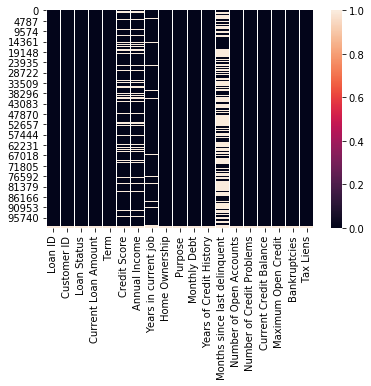

In [25]:
sns.heatmap(train_initial_missing)

<font color='blue'>
From tail in above section and missing values table, it suggest that last rows dataset might contain NaN's.
To check the same visulaizing only last 1000 rows of training data set for missing values

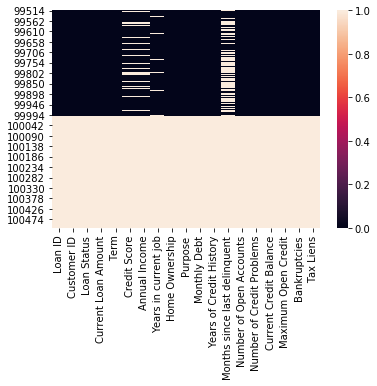

In [26]:
sns.heatmap(train_initial_missing[-1000:][:])

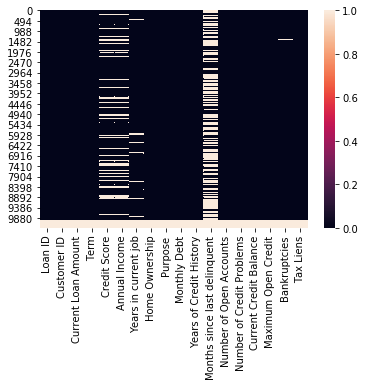

In [27]:
sns.heatmap(test_initial_missing)

<font color='blue'>
From heatmap above, it is evident that last 514 and 353 rows of training and testing data-set contians only NaN's values.

### Deal with missing data

Dropping the last columns of training and testing data set

In [28]:
train_initial.drop(train_initial.tail(514).index, inplace=True)
train_initial.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070.0,Short Term,725.0,475437.0,7 years,Own Home,other,2202.86,22.3,NaN,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0
99999,c63916c6-6d46-47a9-949a-51d09af4414f,1b3014be-5c07-4d41-abe7-44573c375886,Fully Paid,99999999.0,Short Term,743.0,935180.0,NaN,Own Home,Debt Consolidation,9118.10,13.0,NaN,4.0,1.0,45600.0,91014.0,1.0,0.0


In [29]:
test_initial.drop(test_initial.tail(353).index, inplace=True)
test_initial.tail()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
9995,c4ab66f9-833c-43b8-879c-4f8bcb64dd14,8ee2002b-8fb6-4af0-ab74-25a1c23e7647,157806.0,Short Term,731.0,1514376.0,6 years,Rent,Debt Consolidation,4795.41,12.5,NaN,9.0,0.0,87058.0,234410.0,0.0,0.0
9996,bbd3a392-01b4-4e0e-9c28-b2a4a39beac7,6c306306-f5c2-4db5-b74a-af2895123ecb,132550.0,Short Term,718.0,763192.0,4 years,Home Mortgage,Debt Consolidation,12401.87,9.9,20.0,8.0,0.0,74309.0,329692.0,0.0,0.0
9997,da9870de-4280-46a3-8fc6-91cfe5bfde9d,cc94e25e-1060-4465-b603-194e122f0239,223212.0,Long Term,NaN,NaN,NaN,Rent,Debt Consolidation,4354.42,27.2,NaN,8.0,1.0,99636.0,568370.0,1.0,0.0
9998,0cc8e0e0-1bc6-49d7-ad0f-0598b647458f,f90cf410-a34b-49e7-8af9-2b405e17b827,99999999.0,Short Term,721.0,972097.0,10+ years,Home Mortgage,Debt Consolidation,12232.20,16.8,24.0,8.0,1.0,184984.0,240658.0,0.0,0.0
9999,14f94b64-26c4-48fd-b916-1388d7adcc1d,f1838fa9-7ad9-44d5-97a6-7a6d3f3529d7,99999999.0,Short Term,748.0,1079960.0,6 years,Home Mortgage,Debt Consolidation,12239.61,19.7,NaN,14.0,0.0,179018.0,607882.0,0.0,0.0


Again checking the missing values

In [30]:
missing_values_tab(train_initial)

,Total_missing_values,Missing_Values_Percentage
Months since last delinquent,53141,53.141
Credit Score,19154,19.154
Annual Income,19154,19.154
Years in current job,4222,4.222
Bankruptcies,204,0.204
Tax Liens,10,0.010
Maximum Open Credit,2,0.002
Years of Credit History,0,0.000
Current Credit Balance,0,0.000
Number of Credit Problems,0,0.000


In [31]:
missing_values_tab(test_initial)

,Total_missing_values,Missing_Values_Percentage
Months since last delinquent,5306,53.06
Credit Score,1981,19.81
Annual Income,1981,19.81
Years in current job,427,4.27
Bankruptcies,22,0.22
Tax Liens,1,0.01
Maximum Open Credit,0,0.00
Current Credit Balance,0,0.00
Number of Credit Problems,0,0.00
Number of Open Accounts,0,0.00


Dropping the "Months since last delinquent" column as missing values percentage is greater than 50%

In [32]:
test_initial.drop(columns=["Months since last delinquent"], axis=1, inplace=True)
train_initial.drop(columns=["Months since last delinquent"], axis=1, inplace=True)

missing_values_tab(train_initial)

,Total_missing_values,Missing_Values_Percentage
Credit Score,19154,19.154
Annual Income,19154,19.154
Years in current job,4222,4.222
Bankruptcies,204,0.204
Tax Liens,10,0.010
Maximum Open Credit,2,0.002
Years of Credit History,0,0.000
Current Credit Balance,0,0.000
Number of Credit Problems,0,0.000
Number of Open Accounts,0,0.000


In [33]:
missing_values_tab(test_initial)

,Total_missing_values,Missing_Values_Percentage
Credit Score,1981,19.81
Annual Income,1981,19.81
Years in current job,427,4.27
Bankruptcies,22,0.22
Tax Liens,1,0.01
Years of Credit History,0,0.00
Maximum Open Credit,0,0.00
Current Credit Balance,0,0.00
Number of Credit Problems,0,0.00
Number of Open Accounts,0,0.00


Dropping rows of containf NaN's in "Bankruptcies", "Tax Liens", "Maximum Open Credit" columns as values are less than 1 %

In [34]:
train_initial.drop(train_initial['Bankruptcies'][train_initial['Bankruptcies'].isnull() == True].index, axis=0, inplace=True)
train_initial.drop(train_initial['Tax Liens'][train_initial['Tax Liens'].isnull() == True].index, axis=0, inplace=True)
train_initial.drop(train_initial['Maximum Open Credit'][train_initial['Maximum Open Credit'].isnull() == True].index, axis=0, inplace=True)
missing_values_tab(train_initial)

,Total_missing_values,Missing_Values_Percentage
Credit Score,19111,19.150450
Annual Income,19111,19.150450
Years in current job,4222,4.230715
Loan ID,0,0.000000
Years of Credit History,0,0.000000
Bankruptcies,0,0.000000
Maximum Open Credit,0,0.000000
Current Credit Balance,0,0.000000
Number of Credit Problems,0,0.000000
Number of Open Accounts,0,0.000000


In [35]:
test_initial.drop(test_initial['Bankruptcies'][test_initial['Bankruptcies'].isnull() == True].index, axis=0, inplace=True)
test_initial.drop(test_initial['Tax Liens'][test_initial['Tax Liens'].isnull() == True].index, axis=0, inplace=True)
test_initial.drop(test_initial['Maximum Open Credit'][test_initial['Maximum Open Credit'].isnull() == True].index, axis=0, inplace=True)
missing_values_tab(test_initial)

,Total_missing_values,Missing_Values_Percentage
Credit Score,1978,19.823612
Annual Income,1978,19.823612
Years in current job,427,4.279415
Loan ID,0,0.000000
Years of Credit History,0,0.000000
Bankruptcies,0,0.000000
Maximum Open Credit,0,0.000000
Current Credit Balance,0,0.000000
Number of Credit Problems,0,0.000000
Number of Open Accounts,0,0.000000


Using KNN imputer to fill missing values

In [36]:
# Creating method to impute missing values
def dataframe_imputer(df):
    imputer = KNNImputer(n_neighbors=20)
    df_resp = pd.DataFrame(imputer.fit_transform(df))
    df_resp.columns = df.columns
    return df_resp
print("Created method to impute missing values")

Created method to impute missing values


In [40]:
train_int_values = [3,5,6,10,11,12,13,14,15,16,17]
test_int_values = [2,4,5,9,10,11,12,13,14,15,16]
train_initial.iloc[:, train_int_values]

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,445412.0,709.0,1167493.0,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,262328.0,NaN,NaN,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,99999999.0,741.0,2231892.0,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,347666.0,721.0,806949.0,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,176220.0,NaN,NaN,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
99995,147070.0,725.0,475437.0,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,99999999.0,732.0,1289416.0,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,103136.0,742.0,1150545.0,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,530332.0,746.0,1717524.0,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0


In [41]:
test_initial.iloc[:, test_int_values]

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,611314.0,747.0,2074116.0,42000.83,21.8,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,266662.0,734.0,1919190.0,36624.40,19.4,11.0,0.0,679573.0,904442.0,0.0,0.0
2,153494.0,709.0,871112.0,8391.73,12.5,10.0,0.0,38532.0,388036.0,0.0,0.0
3,176242.0,727.0,780083.0,16771.87,16.5,16.0,1.0,156940.0,531322.0,1.0,0.0
4,321992.0,744.0,1761148.0,39478.77,26.0,14.0,0.0,359765.0,468072.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,157806.0,731.0,1514376.0,4795.41,12.5,9.0,0.0,87058.0,234410.0,0.0,0.0
9996,132550.0,718.0,763192.0,12401.87,9.9,8.0,0.0,74309.0,329692.0,0.0,0.0
9997,223212.0,NaN,NaN,4354.42,27.2,8.0,1.0,99636.0,568370.0,1.0,0.0
9998,99999999.0,721.0,972097.0,12232.20,16.8,8.0,1.0,184984.0,240658.0,0.0,0.0


In [42]:
train_clean = dataframe_imputer(train_initial.iloc[:, train_int_values])
missing_values_tab(train_clean)

,Total_missing_values,Missing_Values_Percentage
Current Loan Amount,0,0.0
Credit Score,0,0.0
Annual Income,0,0.0
Monthly Debt,0,0.0
Years of Credit History,0,0.0
Number of Open Accounts,0,0.0
Number of Credit Problems,0,0.0
Current Credit Balance,0,0.0
Maximum Open Credit,0,0.0
Bankruptcies,0,0.0


In [43]:
test_clean = dataframe_imputer(test_initial.iloc[:, test_int_values])
missing_values_tab(test_clean)

,Total_missing_values,Missing_Values_Percentage
Current Loan Amount,0,0.0
Credit Score,0,0.0
Annual Income,0,0.0
Monthly Debt,0,0.0
Years of Credit History,0,0.0
Number of Open Accounts,0,0.0
Number of Credit Problems,0,0.0
Current Credit Balance,0,0.0
Maximum Open Credit,0,0.0
Bankruptcies,0,0.0
